In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import glob
from natsort import natsorted
import cv2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
! gdown --id 1DI8TC-KJF_AYSJ5JtL-9JtKe_tvd5-oY

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DI8TC-KJF_AYSJ5JtL-9JtKe_tvd5-oY
To: /content/hemorrhage_diagnosis.csv
100% 52.9k/52.9k [00:00<00:00, 5.70MB/s]


In [3]:
! gdown --id 1p_F4lSCX87VYTm05RT1WMe3IPRyBN6r0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p_F4lSCX87VYTm05RT1WMe3IPRyBN6r0
To: /content/Patients_CT.zip
100% 93.3M/93.3M [00:00<00:00, 193MB/s]


In [4]:
with zipfile.ZipFile('Patients_CT.zip', 'r') as z:
  z.extractall()

In [5]:
df = pd.read_csv('hemorrhage_diagnosis.csv')
df.rename(columns={'PatientNumber': 'Patient Number'}, inplace=True)


In [6]:
df.drop(['Fracture_Yes_No'], axis=1, inplace=True)
df.head()

,Patient Number,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage
0,49,1,0,0,0,0,0,1
1,49,2,0,0,0,0,0,1
2,49,3,0,0,0,0,0,1
3,49,4,0,0,0,0,0,1
4,49,5,0,0,0,0,0,1


In [7]:
directory = glob.glob('/content/Patients_CT/*/brain')
sorted_path = natsorted(directory)
sorted_path

['/content/Patients_CT/049/brain',
 '/content/Patients_CT/050/brain',
 '/content/Patients_CT/051/brain',
 '/content/Patients_CT/052/brain',
 '/content/Patients_CT/053/brain',
 '/content/Patients_CT/054/brain',
 '/content/Patients_CT/055/brain',
 '/content/Patients_CT/056/brain',
 '/content/Patients_CT/057/brain',
 '/content/Patients_CT/058/brain',
 '/content/Patients_CT/059/brain',
 '/content/Patients_CT/060/brain',
 '/content/Patients_CT/061/brain',
 '/content/Patients_CT/062/brain',
 '/content/Patients_CT/063/brain',
 '/content/Patients_CT/064/brain',
 '/content/Patients_CT/065/brain',
 '/content/Patients_CT/066/brain',
 '/content/Patients_CT/067/brain',
 '/content/Patients_CT/068/brain',
 '/content/Patients_CT/069/brain',
 '/content/Patients_CT/070/brain',
 '/content/Patients_CT/071/brain',
 '/content/Patients_CT/072/brain',
 '/content/Patients_CT/073/brain',
 '/content/Patients_CT/074/brain',
 '/content/Patients_CT/075/brain',
 '/content/Patients_CT/076/brain',
 '/content/Patients_

In [8]:
image_paths = []
for path in sorted_path:
  image_paths.extend(glob.glob(os.path.join(path, '*.jpg')))
image_paths = natsorted(image_paths)

In [9]:
exclude_substring = 'HGE_Seg'
# Filter out the files containing 'HGE_Seg' in the filename
filtered_paths = [file for file in image_paths if exclude_substring not in os.path.basename(file)]
image_paths = filtered_paths

In [10]:
hemorrhage_label = np.array(df['No_Hemorrhage'])
hemorrhage_types = df[['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']].values
labels = (np.column_stack((hemorrhage_label, hemorrhage_types)))

In [11]:
image_size = (64,64)
images = []
for path in image_paths:
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, image_size)
  images.append(img)

In [12]:
images = np.array(images)
images = images.astype('float32') / 255.0
images

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        [0.        , 0.00784314, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        ...,
        [0.        , 0.00784314, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        [0.        , 0.00784314, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        [0.        , 0.00784314, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        ...,
        [0.        , 0.00784314, 0.00392157, ..., 0.00392157,
         0.00392157, 0.        ],
        [0. 

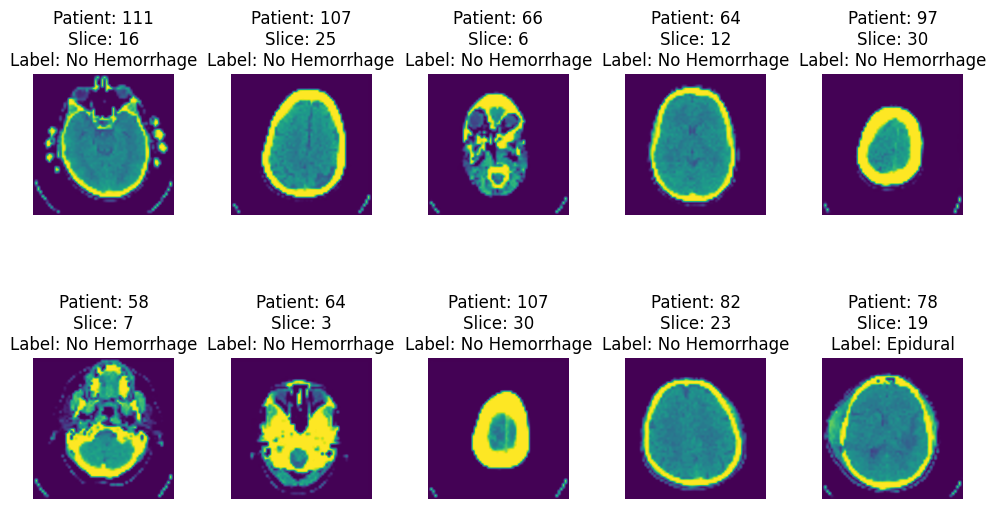

,Patient Number,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage
0,111,16,0,0,0,0,0,1
1,107,25,0,0,0,0,0,1
2,66,6,0,0,0,0,0,1
3,64,12,0,0,0,0,0,1
4,97,30,0,0,0,0,0,1
5,58,7,0,0,0,0,0,1
6,64,3,0,0,0,0,0,1
7,107,30,0,0,0,0,0,1
8,82,23,0,0,0,0,0,1
9,78,19,0,0,0,1,0,0


In [13]:
# Define the number of images to display
num_images = 10

# Generate random indices to select images from the dataset
random_indices = np.random.choice(len(images), num_images, replace=False)

# Plot the images and their corresponding labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

displayed_rows = []

for i, idx in enumerate(random_indices):
    # Get the image and label
    image = images[idx]
    label = labels[idx]

    # Get the Patient Number and SliceNumber from the row in the DataFrame
    patient_number = df.loc[idx, 'Patient Number']
    slice_number = df.loc[idx, 'SliceNumber']

    # Get the corresponding row from the DataFrame
    corresponding_row = df.loc[(df['Patient Number'] == patient_number) & (df['SliceNumber'] == slice_number)]

    # Append the corresponding row to the list
    displayed_rows.append(corresponding_row)

    # Get the hemorrhage types labels
    hemorrhage_types = label[2:]  # Start from index 2

    # Reshape the image to its original size
    image = cv2.resize(image, (256, 256))

    # Determine the label text based on the hemorrhage types
    label_text = ""
    for j, hemorrhage_type in enumerate(hemorrhage_types):
        if hemorrhage_type == 1:
            if label_text:
                label_text += ", "
            label_text += df.columns[j+3]  # Start from index 2

    # Check if there is no hemorrhage
    if label_text == "":
        label_text = "No Hemorrhage"

    # Construct the title with the Patient Number and SliceNumber
    title = f"Patient: {patient_number}\nSlice: {slice_number}\nLabel: {label_text}"

    # Plot the image and label
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Adjust the spacing between lines

plt.show()

# Convert the displayed rows list into a DataFrame
displayed_df = pd.concat(displayed_rows, ignore_index=True)

# Print the displayed DataFrame
displayed_df

In [14]:
# Split the dataset into training, validation, and testing sets
train_images, test_images, train_hemorrhage_label, test_hemorrhage_label = train_test_split(
    images, hemorrhage_label, test_size=0.2)
input_shape = image_size + (1,)  # Grayscale images have 1 channel


In [ ]:
# Build the CNN model for hemorrhage classification
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(train_images, train_hemorrhage_label, epochs=35, batch_size=32)

# Evaluate the CNN model on the testing set
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_hemorrhage_label)
print(f"CNN Model Test Loss: {test_loss}")
print(f"CNN Model Test Accuracy: {test_accuracy}")

# Predict hemorrhage labels using the CNN model
hemorrhage_predictions = cnn_model.predict(test_images)

# Convert the predictions to binary values (0 or 1) using a threshold
threshold = 0.5  # Adjust the threshold as needed
hemorrhage_predictions_binary = (hemorrhage_predictions > threshold).astype(int)

# Count the number of positive predictions (hemorrhage present)
num_hemorrhage_images = np.sum(hemorrhage_predictions_binary)

print(f"Number of images predicted as having a hemorrhage: {num_hemorrhage_images}")

Epoch 1/35
63/63 [==============================] - 19s 229ms/step - loss: 0.3481 - accuracy: 0.8665
Epoch 2/35
 1/63 [..............................] - ETA: 14s - loss: 0.3475 - accuracy: 0.8125

In [ ]:
#בדיקה של מטריצת ערבול
# Count the number of positive predictions (hemorrhage present)
num_hemorrhage_images = np.sum(hemorrhage_predictions_binary)
print(f"Number of images predicted as having a hemorrhage: {num_hemorrhage_images}")

# Confusion Matrix
cm = confusion_matrix(test_hemorrhage_label, hemorrhage_predictions_binary)
print("Confusion Matrix:")
print(cm)

# Classification Report
classification_rep = classification_report(test_hemorrhage_label, hemorrhage_predictions_binary)
print("Classification Report:")
print(classification_rep)

In [ ]:
#המרה לשחור לבן
def kmeans_segmentation(image, num_clusters):
    # Convert the image to the Lab color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    # Reshape the image for k-means clustering
    reshaped_image = lab_image.reshape(-1, 3)

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(reshaped_image)

    # Get the labels from the clustering result
    labels = kmeans.labels_

    # Reshape the labels back to the original image shape
    segmented_image = labels.reshape(image.shape[:2])

    # Convert the segmented image to black and white
    # You can choose a threshold value based on your specific needs
    threshold_value = 127
    _, bw_image = cv2.threshold(segmented_image, threshold_value, 255, cv2.THRESH_BINARY)

    return bw_image

In [ ]:
# Set the number of clusters for K-means segmentation
num_clusters = 5  # Adjust the number of clusters as needed

# Perform CNN-based classification on the test set
hemorrhage_predictions = cnn_model.predict(test_images)

# Set a threshold for hemorrhage classification
threshold = 0.6

# Initialize lists to store segmentation results and hemorrhage types
segmentation_results = []
hemorrhage_types = []

# Iterate over the predicted hemorrhage labels and images
for i, (hemorrhage_label, image) in enumerate(zip(hemorrhage_predictions, test_images)):
    # Check if the predicted label exceeds the threshold
    if hemorrhage_label > threshold:
        # Apply K-means clustering on the image
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        reshaped_image = image.reshape(-1, 1)
        kmeans.fit(reshaped_image)
        labels = kmeans.labels_
        binary_mask = labels.reshape(image.shape[:2])

        # Append the segmentation result to the list
        segmentation_results.append(binary_mask)

# Define a mapping of cluster labels to hemorrhage types
hemorrhage_type_mapping = {
    0: "Hemorrhage - Epidural",
    1: "Hemorrhage - Subdural",
    2: "Hemorrhage - Subarachnoid",
    3: "Hemorrhage - Intraparenchymal",
    4: "Hemorrhage - Intraventricular"
}

# Iterate over the segmentation results and assign the hemorrhage type based on the most frequent cluster label
for binary_mask in segmentation_results:
    labels, counts = np.unique(binary_mask, return_counts=True)
    most_frequent_label = labels[np.argmax(counts)]
    hemorrhage_type = hemorrhage_type_mapping.get(most_frequent_label, "Unknown")

    # Append the assigned hemorrhage type to the list
    hemorrhage_types.append(hemorrhage_type)

# Count the occurrence of each hemorrhage type
hemorrhage_counters = Counter(hemorrhage_types)

# Print the hemorrhage types for each image
for i, hemorrhage_type in enumerate(hemorrhage_types):
    print(f"Image {i+1}: Hemorrhage Type - {hemorrhage_type}")

# Print the hemorrhage type counts
print("Hemorrhage Type Counts:")
for hemorrhage_type, count in hemorrhage_counters.items():
    print(f"{hemorrhage_type}: {count}")

In [ ]:
#המספרים האמיתיים
print("number of Hemorrhage:", df['No_Hemorrhage'].value_counts()[0])
print("number of Intraventricular:", df['Intraventricular'].value_counts()[1])
print("number of Intraparenchymal:", df['Intraparenchymal'].value_counts()[1])
print("number of Subdural:", df['Subdural'].value_counts()[1])
print("number of Subarachnoid:", df['Subarachnoid'].value_counts()[1])
print("number of Epidural:", df['Epidural'].value_counts()[1])
print("number of No_Hemorrhage:", df['No_Hemorrhage'].value_counts()[1])

In [ ]:
#המספר האמיתי של CNN מול הפרידקט
print(" The real number of real Hemorrhage:", df['No_Hemorrhage'].value_counts()[0])
print(f"Number of images predicted as having a hemorrhage: {num_hemorrhage_images}")